In [15]:
import tensorflow as tf
from tensorflow import keras

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Define the CNN architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same',
                        activation='relu', input_shape=x_train.shape[1:]),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])

# Train the model on the training data
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 94s 1us/step


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.3927 - loss: 1.6640 - val_accuracy: 0.5882 - val_loss: 1.1601
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6240 - loss: 1.0728 - val_accuracy: 0.6390 - val_loss: 1.0587
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6781 - loss: 0.9254 - val_accuracy: 0.6643 - val_loss: 0.9580
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7129 - loss: 0.8344 - val_accuracy: 0.6890 - val_loss: 0.9025
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7374 - loss: 0.7616 - val_accuracy: 0.6925 - val_loss: 0.9059
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7482 - loss: 0.7126 - val_accuracy: 0.6955 - val_loss: 0.9001
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7744 - loss: 0.6410 - val_accuracy: 0.7016 - val_loss: 0.8903
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7902 - loss: 0

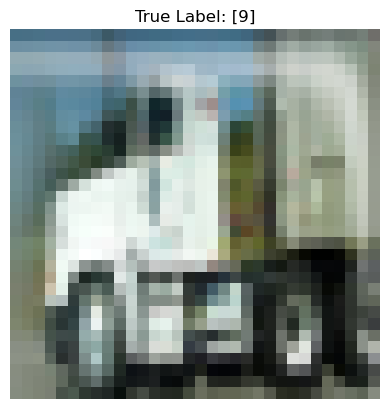

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Select a random image from the test set
index = np.random.randint(0, len(x_test))
example_image = x_test[index]
example_label = y_test[index]

# Display the image and its label
plt.imshow(example_image)
plt.title(f"True Label: {example_label}")
plt.axis('off')
plt.show()


In [28]:
example_image = np.expand_dims(example_image, axis=0)

# Get the predicted probabilities for each class
predicted_scores = model.predict(example_image)

# Convert the scores to probabilities using softmax
predicted_probabilities = tf.nn.softmax(predicted_scores).numpy()

# Get the predicted label (class with highest probability)
predicted_label = np.argmax(predicted_probabilities)

# Get the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display the predicted label and probabilities
print(f"Predicted Label: {class_names[predicted_label]}")
print("Predicted Probabilities:")
for i, prob in enumerate(predicted_probabilities[0]):
    print(f"{class_names[i]}: {prob:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Label: truck
Predicted Probabilities:
airplane: 0.0000
automobile: 0.0005
bird: 0.0000
cat: 0.0000
deer: 0.0000
dog: 0.0000
frog: 0.0000
horse: 0.0000
ship: 0.0000
truck: 0.9995
